# Loan Analysis 
Dans ce dataset il est principalement question de fournir une analyse detaillee des donnees provenant du dataset Loan donnee en cours par l'enseignant. Les donnees representent des informations sur les clients d'une petite banque et leurs resultat de demande d'emprunt.
Il sera question donc, apres avoir importe les donnees, de :
- faire de l'inspection de donnees (Data Understanding)
- faire de la preparation de donnees (Data preparation including Data Cleaning)
- faire de la comprehension de Caracteristiques/Fonctionnalites  (Feature Understanding)
- faire de l'interrogation de donnees
- et enfin de l'evaluation de donnees.


## Data Exploration

### Step 0 : import and read the data

In [133]:
# libraries import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

In [134]:
df = pd.read_csv('../datasets/loan/train.csv')
test_df = pd.read_csv('../datasets/loan/test.csv')

### Step 1 :Data Understanding
 

In [135]:
# dataframe shape
df.shape

(614, 13)

In [136]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [137]:
# essayons de voir le nombre de données unique par colonne
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [138]:
# head of dataframe (5 premiers enregistrements)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [139]:
# tail of dataframe (5 derniers enregistrements)
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


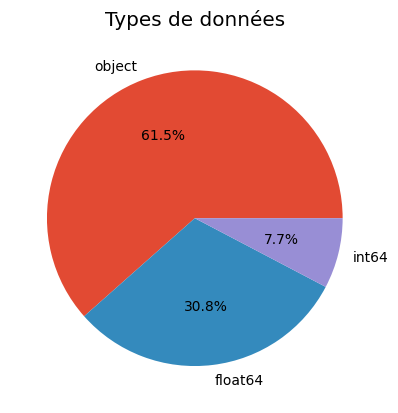

In [140]:
types = df.dtypes.value_counts()

# diagramme en cercle pour mieux visualiser les types de données
plt.pie(types, labels=types.index.map(str), autopct='%1.1f%%')
plt.title('Types de données')
plt.show()

### Step 2 : Data Preparation (and Data Cleaning for more productivity)

In [141]:
# dropping duplicate rows
df = df.drop_duplicates()

In [142]:
# enlevons les "+" de la colonne Dependents pour pouvoir la convertir en int
df['Dependents'] = df['Dependents'].str.replace('+', '')


C:\Users\latio\AppData\Local\Temp\ipykernel_1464\2958641661.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+', '')


In [143]:
# data Cleamig and preprocessing
#  1 - Missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [144]:
# imputing missing values (remplacement des valeurs manquantes par la valeur la plus fréquente sur les colonnes ou il y a des valeurs manquantes)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = imputer.fit_transform(df[[col]])

In [145]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [146]:
# transformer ;a colonne Dependents en int
df['Dependents'] = df['Dependents'].astype(int)

### Step 3 : Feature Understanding

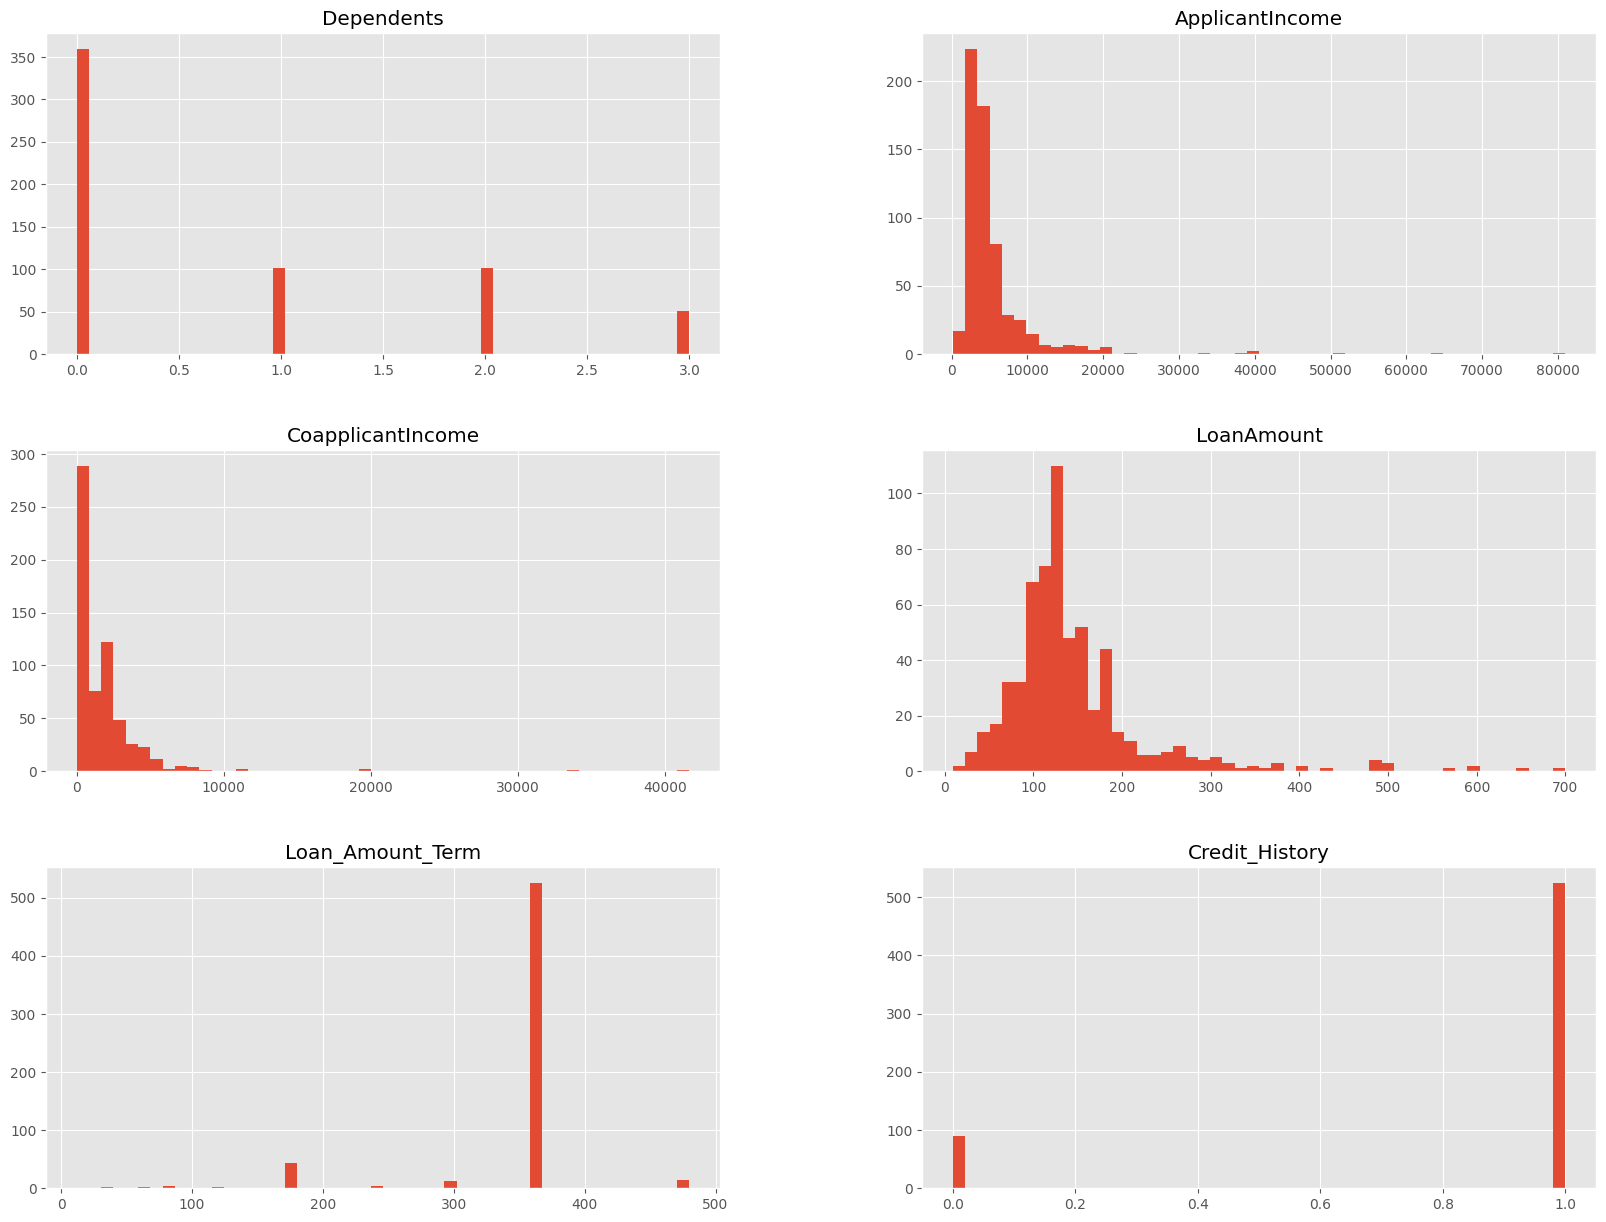

In [147]:
# plotting all features distribution
# histogramme de toutes les variables quantitatives
df.hist(bins=50, figsize=(20,15))
plt.show()

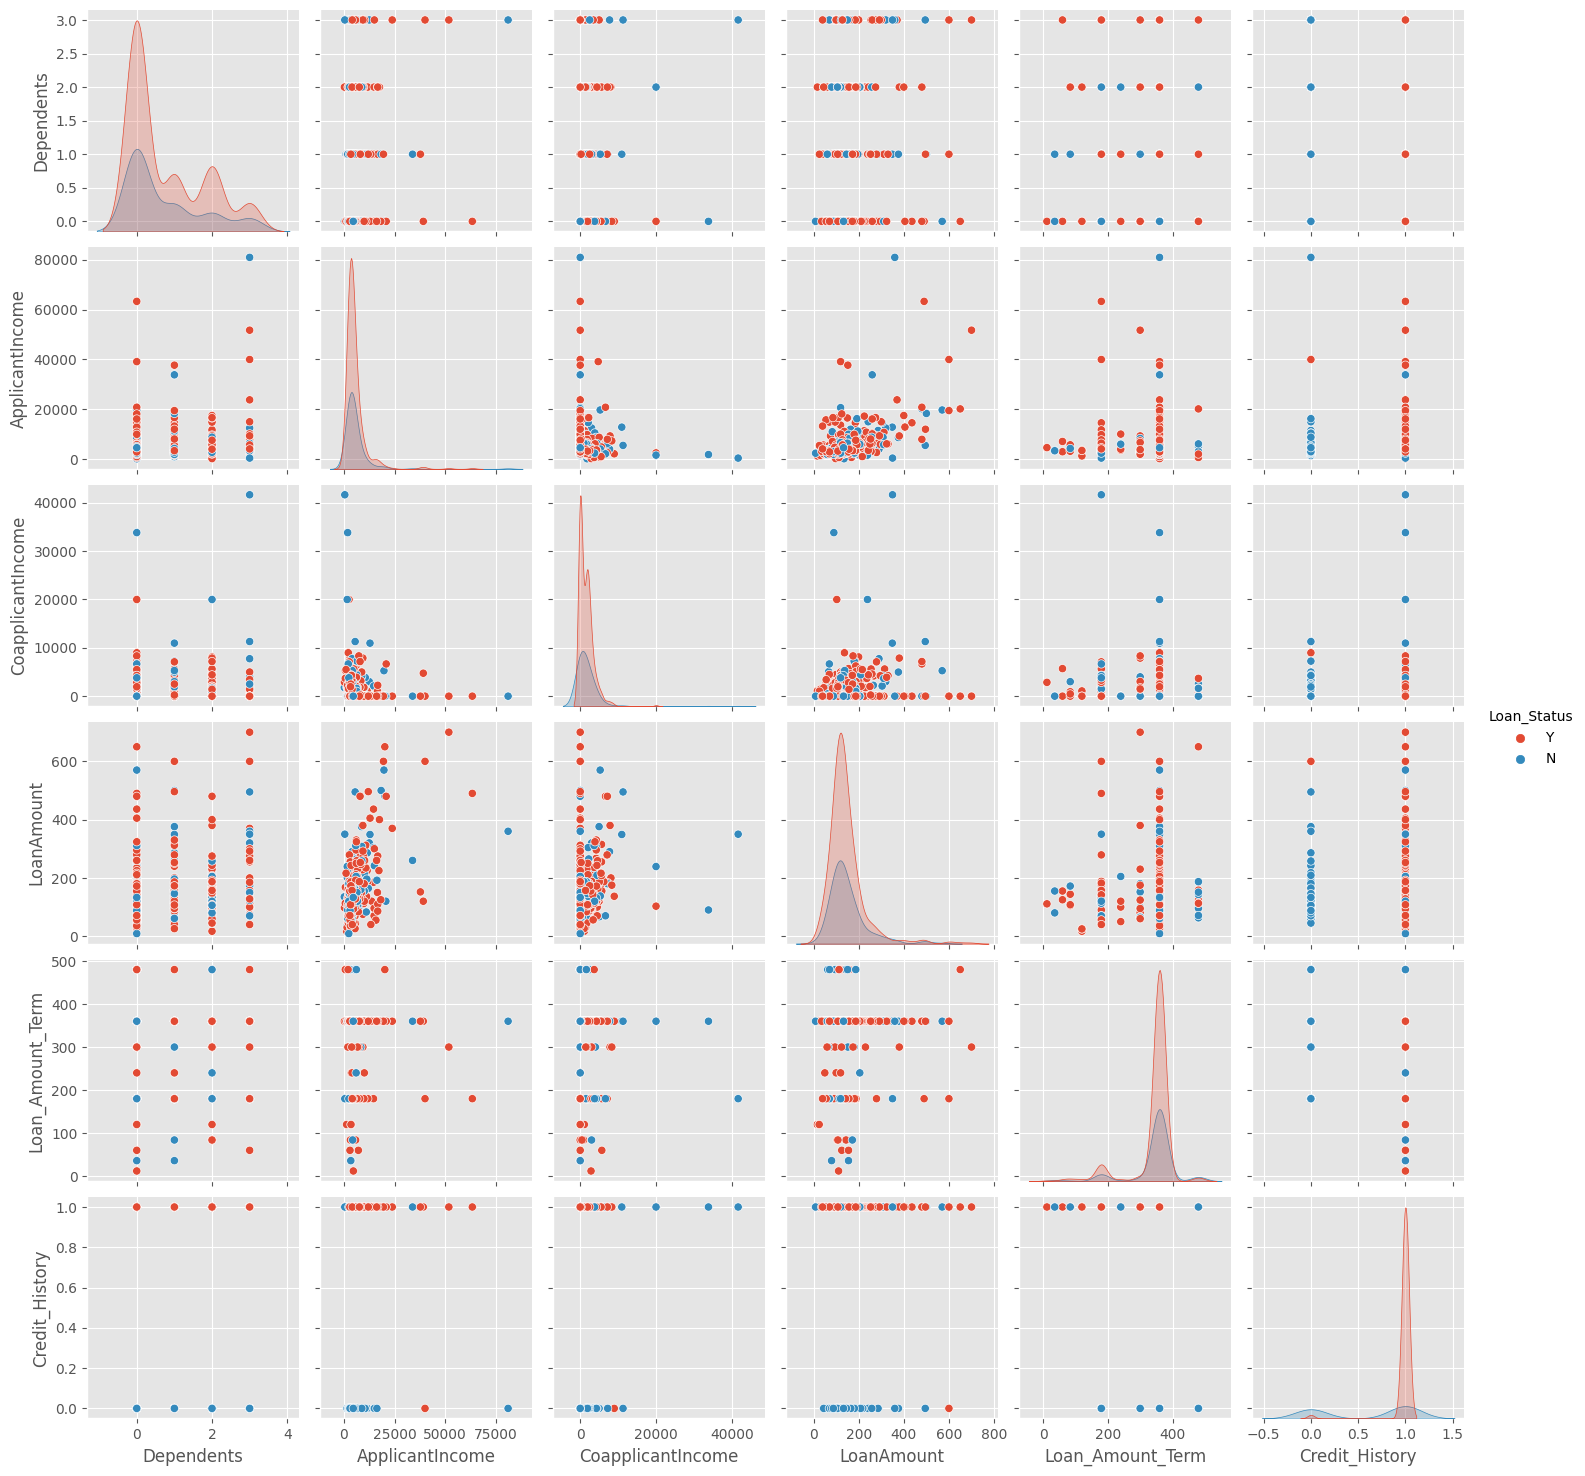

In [148]:
# scatter plot
# nuage de points entre les variables quantitatives avec la variable cible en utilisant seaborn
sns.pairplot(df, hue='Loan_Status')

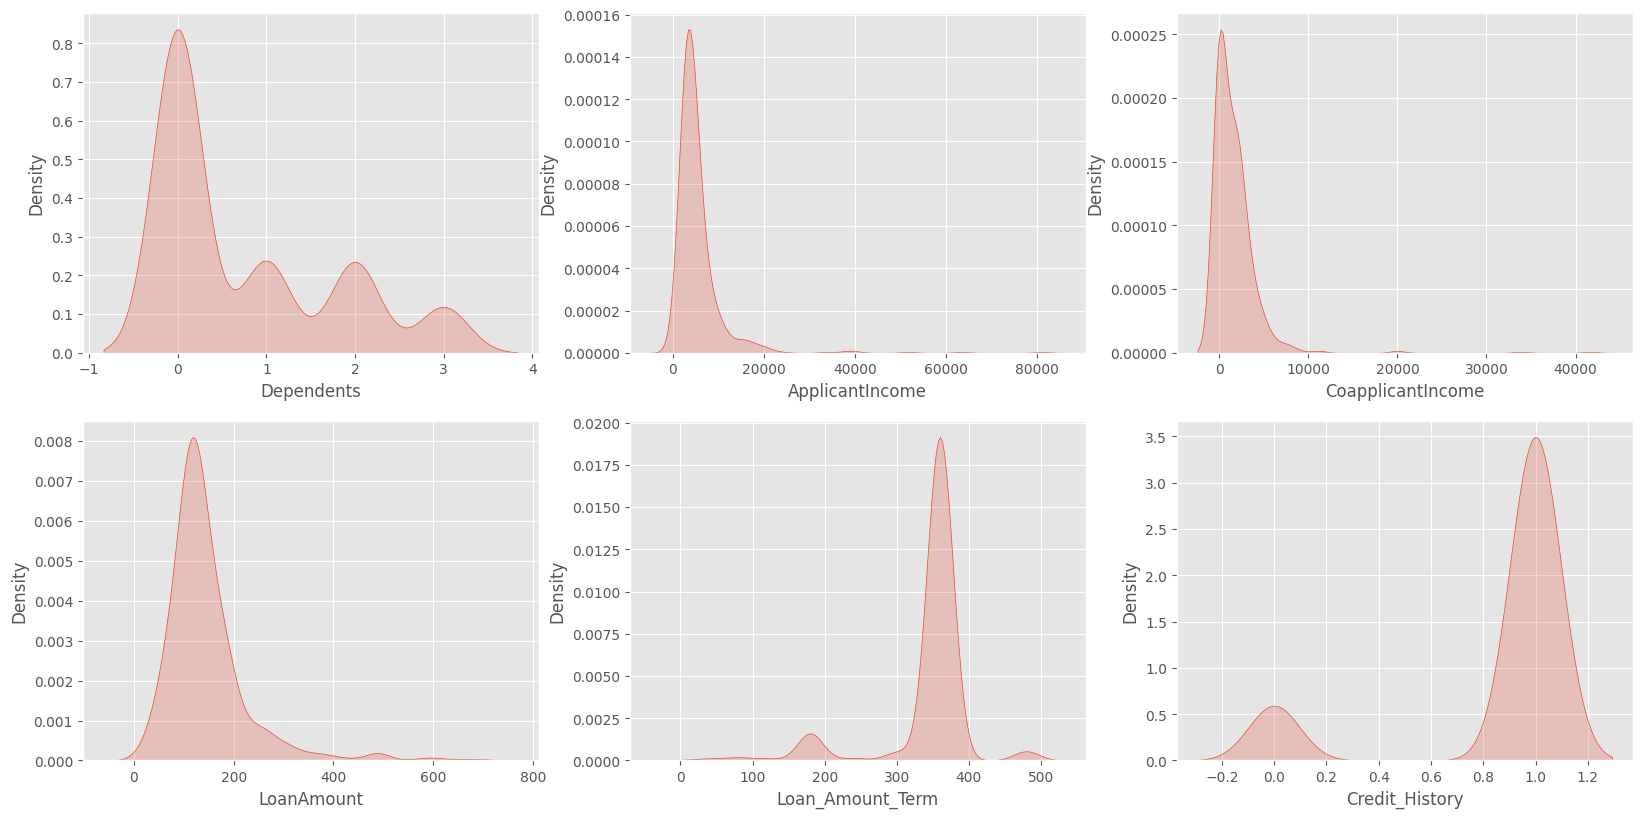

In [149]:
# KDE plot
# courbes de densité des variables quantitatives avec la fonction kdeplot de seaborn en joignant toutes les courbes dans un seul graphique
plt.figure(figsize=(20,15))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df[col], fill=True)
plt.show()


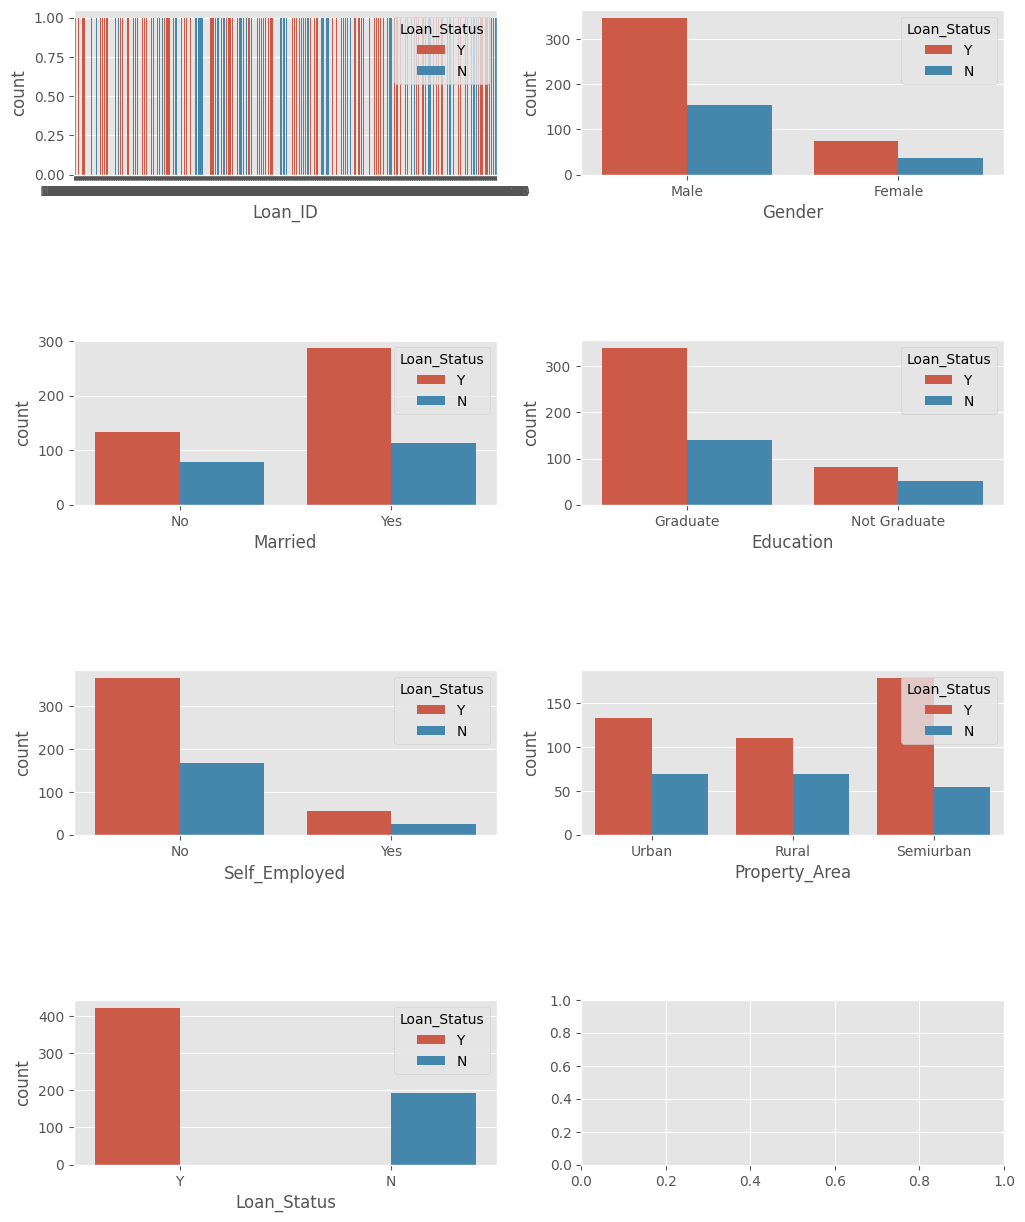

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,15))

for idx, cat_col in enumerate(df.select_dtypes(exclude="number").columns):
    row, col = idx//2, idx%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col])


plt.subplots_adjust(hspace=1)

C:\Users\latio\AppData\Local\Temp\ipykernel_1464\3033423058.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


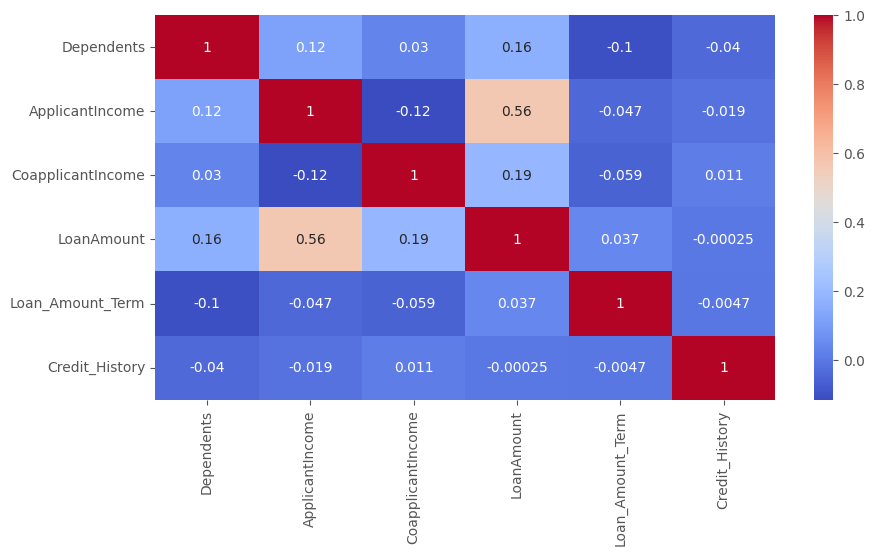

In [151]:
# heatmap of correlation matrix
# matrice de corrélation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\latio\AppData\Local\Temp\ipykernel_1464\1176347439.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[df.corr().abs() > 0.5], annot=True, cmap='coolwarm')


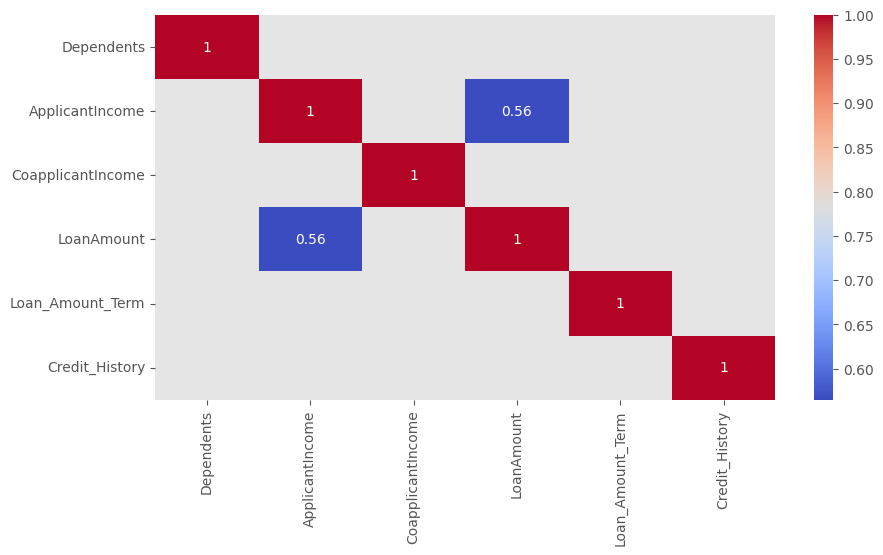

In [152]:
# heatmap avec les correlation supérieures à 0.5 ou inférieures à -0.5
plt.figure(figsize=(10,5))
sns.heatmap(df.corr()[df.corr().abs() > 0.5], annot=True, cmap='coolwarm')
plt.show()

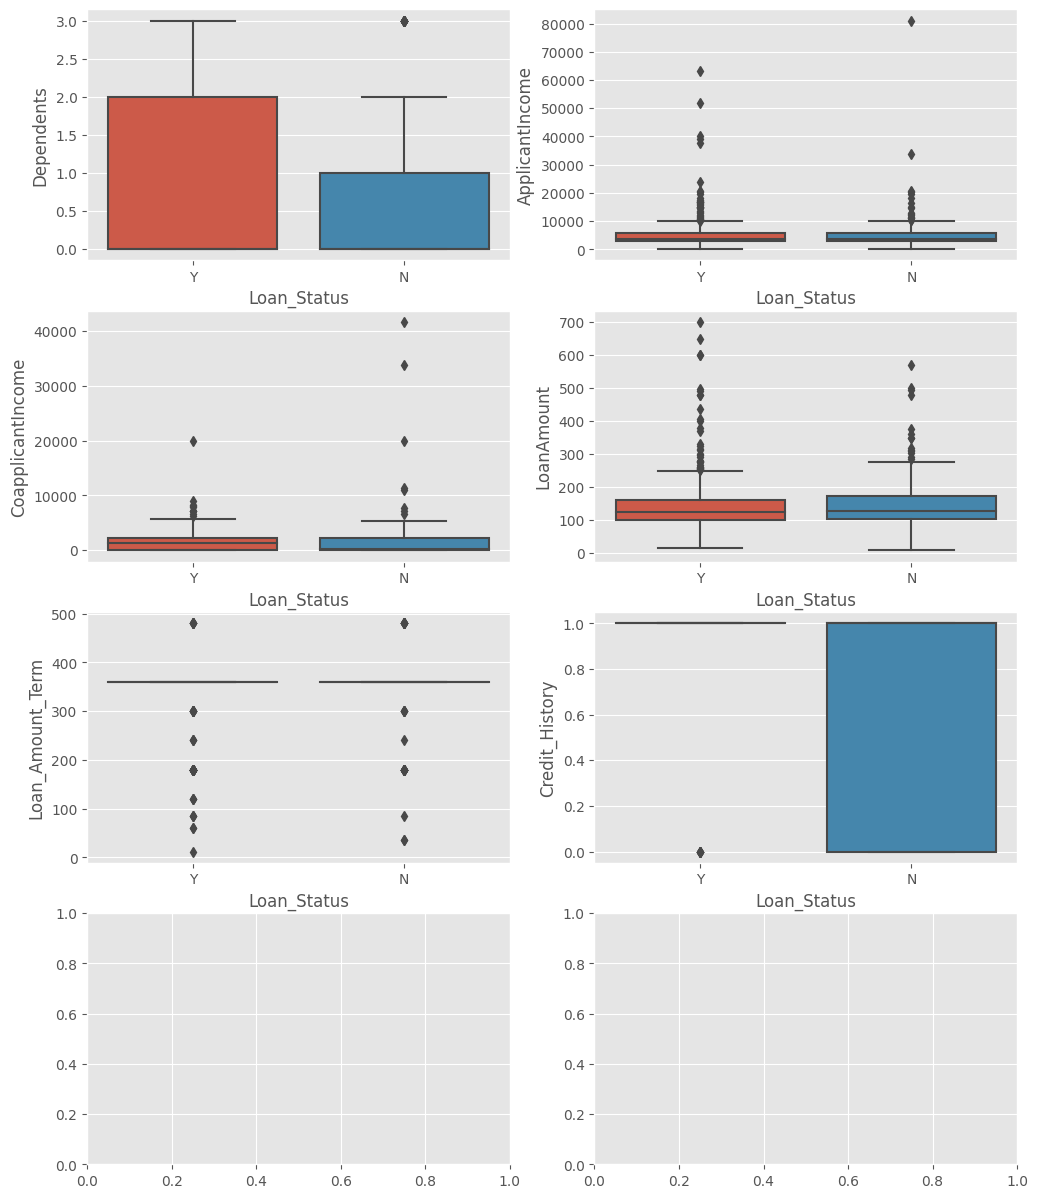

In [153]:
# sns boxplot des variables quantitatives par rapport à la variable cible
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,15))

for idx, cat_col in enumerate(df.select_dtypes(include="number").columns):
    row, col = idx//2, idx%2
    sns.boxplot(x='Loan_Status', y=cat_col, data=df, ax=axes[row, col])


## Feature Engineering

In [154]:
# Dropping irrelevant columns
# Loan_ID is a unique identifier for each loan application and has no impact on the loan status.

df = df.drop('Loan_ID', axis=1)

In [155]:
def remove_outliers(data, columns, k=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [157]:

# removing outliers
df = remove_outliers(df, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

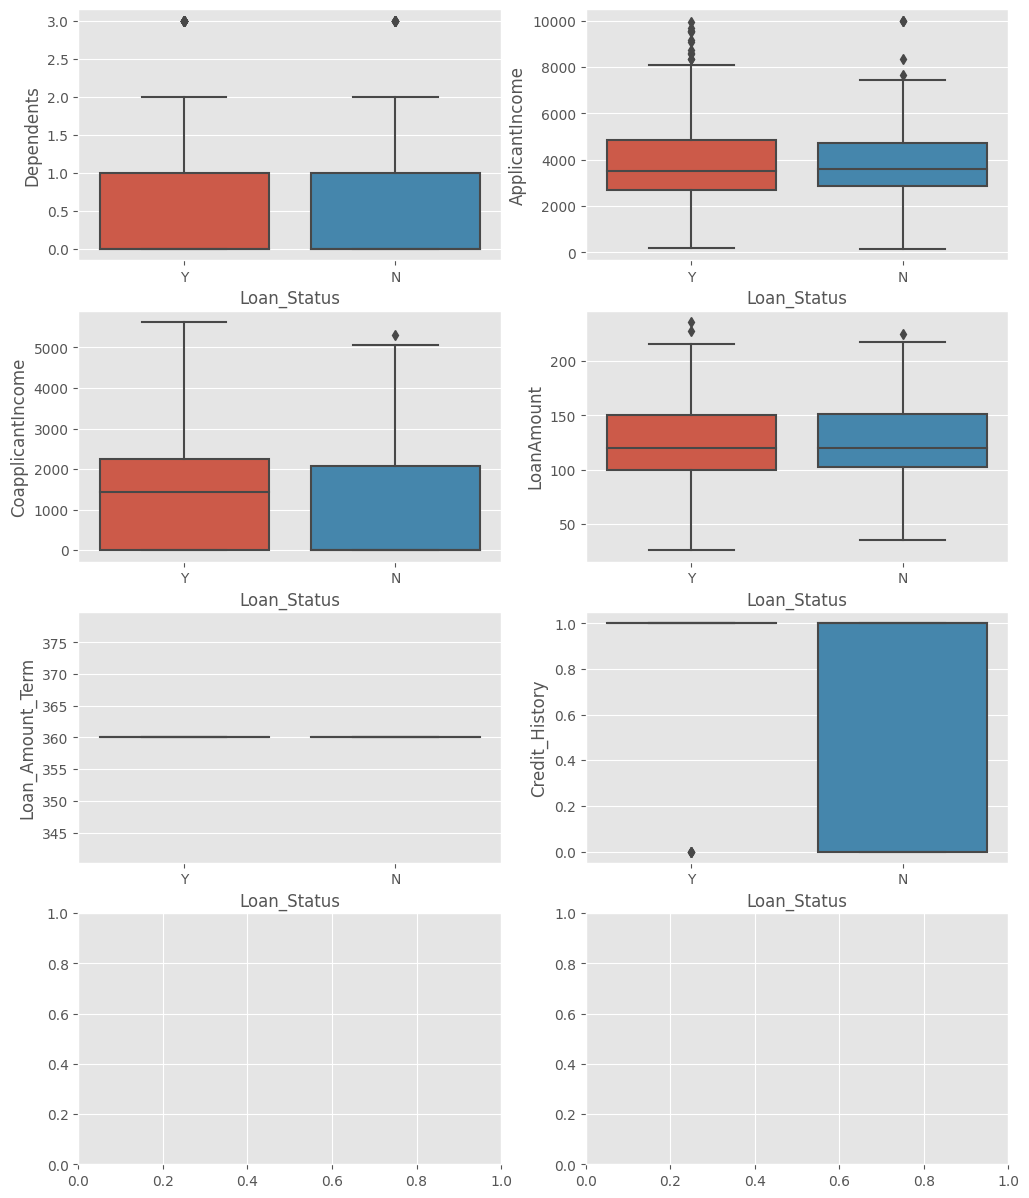

In [158]:
# sns boxplot des variables quantitatives par rapport à la variable cible
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,15))

for idx, cat_col in enumerate(df.select_dtypes(include="number").columns):
    row, col = idx//2, idx%2
    sns.boxplot(x='Loan_Status', y=cat_col, data=df, ax=axes[row, col])


### Encoding Categorical Features

In [ ]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == np.number:
        continue 
    else:
        df[col] = le.fit_transform(df[col])

In [160]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
607,1,1,2,1,0,224,1411.0,157.0,360.0,1.0,0,1
608,1,1,0,0,0,146,1950.0,108.0,360.0,1.0,0,1
609,0,0,0,0,0,102,0.0,71.0,360.0,1.0,0,1
612,1,1,2,0,0,355,0.0,187.0,360.0,1.0,2,1
613,0,0,0,0,1,261,0.0,133.0,360.0,0.0,1,0


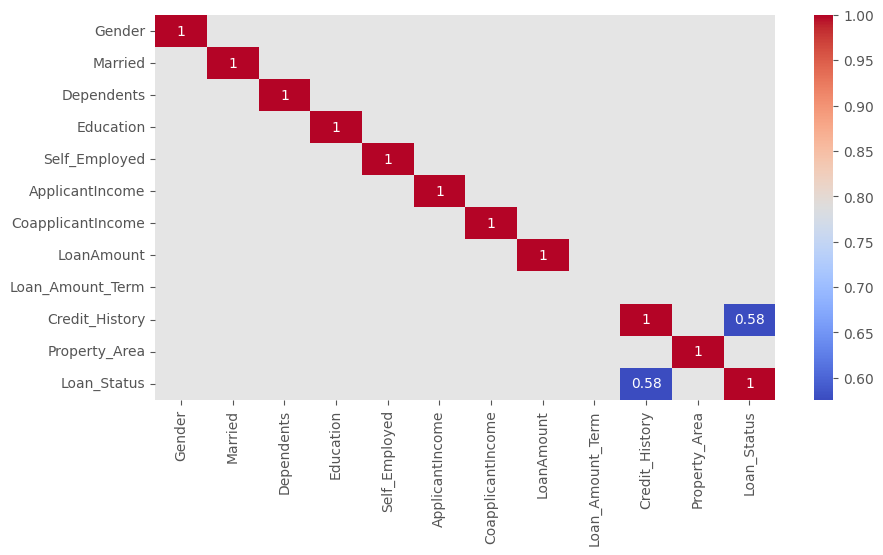

In [161]:
# recherche de nouvelles correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr()[df.corr().abs() > 0.5], annot=True, cmap='coolwarm')
plt.show()

In [163]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# drop the 'Loan Status' column from the 'final' DataFrame to create the feature matrix 'X'
X = df.drop(['Loan_Status'], axis=1)

# assign the 'Loan Status' column to the target variable 'y'
y = df['Loan_Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Modeling

In [164]:
df.Loan_Status.value_counts()

1    317
0    128
Name: Loan_Status, dtype: int64

On remarque un desequilibre entre les valeurs de la variable "loan_status" qui est la variable cible. On va donc essayer de resoudre ce probleme en utilisant la methode de sur-echantillonnage.

In [165]:
# Instantiate the resampling algorithms
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# resampling the data with SMOTE
X_smote, y_smote = smote.fit_resample(X, y)

In [166]:
print('Before SMOTE: ', df['Loan_Status'].value_counts())
print('After SMOTE: ', y_smote.value_counts())


Before SMOTE:  1    317
0    128
Name: Loan_Status, dtype: int64
After SMOTE:  1    317
0    317
Name: Loan_Status, dtype: int64


selection de quelques classifieurs qui pourraient etre performantes et utile pour la classification de notre probleme.

In [172]:
# classifier selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    LogisticRegression(max_iter=1000, random_state = 42),
    DecisionTreeClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42, n_estimators = 100),
    KNeighborsClassifier() 
]

importons quelques metrics pour evaluer les performances de nos classifieurs.

In [173]:
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

- resultat de la classification avec les differents classifieurs sans sur-echantillonnage

In [174]:
results = []

for classifier in classifiers:
    # Train and predict using ADASYN resampled data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Add results to list
    results.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Convert results list to pandas DataFrame
df_results = pd.DataFrame(results)

# Display results DataFrame
print(df_results)

               Classifier  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.876404   0.860759  1.000000  0.925170
1  DecisionTreeClassifier  0.831461   0.895522  0.882353  0.888889
2  RandomForestClassifier  0.865169   0.858974  0.985294  0.917808
3    KNeighborsClassifier  0.696629   0.759494  0.882353  0.816327


In [175]:
results_smote = []

for classifier in classifiers:
    # Train and predict using Smote resampled data
    classifier.fit(X_smote, y_smote)
    y_pred_smote = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy_smote = accuracy_score(y_test, y_pred_smote)
    precision_smote = precision_score(y_test, y_pred_smote)
    recall_smote = recall_score(y_test, y_pred_smote)
    f1_smote = f1_score(y_test, y_pred_smote)
    
    # Add results to list
    results_smote.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy_smote,
        'Precision': precision_smote,
        'Recall': recall_smote,
        'F1': f1_smote
    })

# Convert results list to pandas DataFrame
df_results_smote = pd.DataFrame(results_smote)

# Display results DataFrame
print(df_results_smote)

               Classifier  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.865169   0.868421  0.970588  0.916667
1  DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000
2  RandomForestClassifier  1.000000   1.000000  1.000000  1.000000
3    KNeighborsClassifier  0.662921   0.895833  0.632353  0.741379


Nous remarquons que Random Forest reste constant dans ses performances meme apres le sur-echantillonnage. C'est donc le classifieur qu'il est preferable d'utiliser pour la suite.